
File path........: D:\Data\Lung\DICOM\20211220_SECOVIDNET_7_updated\7XXX00_raw\loops\SCN_7_merőleges_LLA_390.dcm.dcm
SOP Class........: 1.2.840.10008.5.1.4.1.1.3.1 (Ultrasound Multi-frame Image Storage)

Patient's Name...: 7, 
Patient ID.......: 21-12-21-102518
Modality.........: US
Study Date.......: 20211221
Image size.......: 600 x 800
Slice location...: (missing)


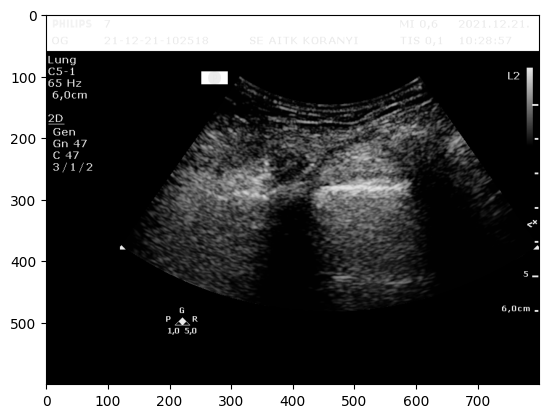

In [71]:
import matplotlib.pyplot as plt
from pathlib import Path
from pydicom import dcmread

#fpath = get_testdata_file('SCN_11_paralel_LLP_390.dcm.dcm')
root = Path('D:/Data/Lung/DICOM')
dcm_path_list = list(root.glob('**/*.dcm'))
ds = dcmread(dcm_path_list[0])

# Normal mode:
print()
print(f"File path........: {dcm_path_list[0]}")
print(f"SOP Class........: {ds.SOPClassUID} ({ds.SOPClassUID.name})")
print()

pat_name = ds.PatientName
print(f"Patient's Name...: {pat_name.family_comma_given()}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
#print(f"Pixel Spacing....: {ds.PixelSpacing}")

# use .get() if not sure the item exists, and want a default value if missing
print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

# plot the image using matplotlib
plt.imshow(ds.pixel_array[1,:,:], cmap=plt.cm.gray)
im = Image.fromarray(ds.pixel_array[1,:,:])
im.save('D:/Data/Lung/test.png')

In [7]:
def Mask(machine):
    maskArray = np.zeros(machine['shape'], dtype=np.uint8)
    angle1 = 90.0 - (machine['mask_angle'] / 2.0)
    angle2 = 90.0 + (machine['mask_angle'] / 2.0)
    maskArray = cv2.ellipse(maskArray, machine['mask_center'], (machine['mask_radius2'], machine['mask_radius2']), 0.0, angle1, angle2, 1, -1)
    maskArray = cv2.circle(maskArray, machine['mask_center'], machine['mask_radius1'], 0, -1)
    return maskArray


def FormatImage(machine, arr):
    interpolation = cv2.INTER_LINEAR
    arr *= machine['mask']
    cropped_image_array = np.array(arr[machine['crop_x1']:machine['crop_x2'],machine['crop_y1']:machine['crop_y2']],dtype=np.uint8)
    height, width = np.shape(cropped_image_array)
    if width>height:
        height = round(height*(machine['output_square_dim']/width))
        width = machine['output_square_dim']
    else:
        width = round(width*(machine['output_square_dim']/height))
        height = machine['output_square_dim']
    padding_arr = np.zeros([round((machine['output_square_dim']-height)/2),machine['output_square_dim']], dtype='uint8')
    resized = cv2.resize(cropped_image_array, dsize=(width,height),interpolation=interpolation)
    stacked = np.vstack((padding_arr,resized,padding_arr))
    if (machine['output_square_dim']-height)%2!=0:
        stacked=np.delete(stacked,0,0)
    return stacked

In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from pydicom import dcmread
from PIL import Image
import numpy as np
import cv2
import os
from tqdm import tqdm

availableMachines = {
    'philips': {
    'shape': [600, 800],
    'crop_x1': 100,
    'crop_x2': 473,
    'crop_y1': 120,
    'crop_y2': 800,
    'mask_center': (460, -115),
    'mask_radius1': 277,
    'mask_radius2': 585,
    'mask_angle': 70.5,
    'output_square_dim': 512,
    'mask': None
    }
}

#fpath = get_testdata_file('SCN_11_paralel_LLP_390.dcm.dcm')
root = Path('D:/Data/Lung/DICOM')
dcm_path_list = list(root.glob('**/*.dcm'))
output_path = Path('D:/Data/Lung/images/RawExports')
machine = availableMachines['philips']
machine['mask'] = Mask(machine)


for file in tqdm(dcm_path_list):
    try:
        ds = dcmread(file)
    except:
        print(f'Error reading file: {file}')
        continue
    file_prefix = '_'.join(str.split(file.name, '_')[2:4])
    for i, frame in enumerate(ds.pixel_array):
        full_filepath = f'{output_path}/{ds.PatientName.family_name}_{file_prefix}_{str(i).zfill(3)}.png'
        if os.path.exists(full_filepath):
            continue

        frame = FormatImage(machine, frame)
        im = Image.fromarray(frame)
        im.save(full_filepath)

  5%|▌         | 30/548 [02:05<36:41,  4.25s/it]

Error reading file: D:\Data\Lung\DICOM\20211221_SECOVIDNET_10_updated\10XX00\loops\x_hibás.dcm.dcm
Error reading file: D:\Data\Lung\DICOM\20211221_SECOVIDNET_10_updated\10XX00\loops\y_hibás.dcm.dcm


 36%|███▌      | 196/548 [14:08<25:24,  4.33s/it]


ValueError: operands could not be broadcast together with shapes (696,860,3) (600,800) (696,860,3) 

In [69]:
import matplotlib.pyplot as plt
from pathlib import Path
from pydicom import dcmread
from PIL import Image
import numpy as np
import cv2
import os
from tqdm import tqdm

availableMachines = {
    'philips': {
    'shape': [600, 800],
    'crop_x1': 100,
    'crop_x2': 473,
    'crop_y1': 120,
    'crop_y2': 800,
    'mask_center': (460, -115),
    'mask_radius1': 277,
    'mask_radius2': 585,
    'mask_angle': 70.5,
    'output_square_dim': 512,
    'mask': None
    }
}

#fpath = get_testdata_file('SCN_11_paralel_LLP_390.dcm.dcm')
root = Path('D:/Data/Lung/DICOM')
dcm_path_list = list(root.glob('**/*.dcm'))
output_path = Path('D:/Data/Lung/images/RawExports/videos')
machine = availableMachines['philips']
machine['mask'] = Mask(machine)


for file in tqdm(dcm_path_list):
    try:
        ds = dcmread(file)
    except:
        print(f'Error reading file: {file}')
        continue    

    file_prefix = '_'.join(str.split(file.name, '_')[2:4])
    video_path = f'{output_path}/{ds.PatientName.family_name}_{file_prefix}.mp4'
    height, width = ds.pixel_array[0].shape
    video = cv2.VideoWriter(video_path, -1, 25, (machine['shape'][0],machine['shape'][1]), False)

    print(f'Writing video: {video_path}')
    for i, frame in enumerate(ds.pixel_array):        
        if os.path.exists(video_path):
            continue

        frame = FormatImage(machine, frame)
        video.write(frame)

    cv2.destroyAllWindows()
    video.release()

  0%|          | 0/548 [00:00<?, ?it/s]

Writing video: D:\Data\Lung\images\RawExports\videos/7_merőleges_LLA.mp4


  0%|          | 1/548 [00:01<13:25,  1.47s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_merőleges_LLM.mp4


  0%|          | 2/548 [00:02<13:03,  1.43s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_merőleges_LUA.mp4


  1%|          | 3/548 [00:04<12:59,  1.43s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_merőleges_LUM.mp4


  1%|          | 4/548 [00:05<12:48,  1.41s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_merőleges_RLA.mp4


  1%|          | 5/548 [00:07<12:49,  1.42s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_merőleges_RLM.mp4


  1%|          | 6/548 [00:08<12:51,  1.42s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_merőleges_RUA.mp4


  1%|▏         | 7/548 [00:09<12:30,  1.39s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_merőleges_RUM.mp4


  2%|▏         | 9/548 [00:12<11:49,  1.32s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_paralel_LLA.mp4


  2%|▏         | 10/548 [00:13<11:29,  1.28s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_paralel_LLM.mp4


  2%|▏         | 11/548 [00:14<11:15,  1.26s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_paralel_LUA.mp4


  2%|▏         | 12/548 [00:16<11:15,  1.26s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_paralel_LUM.mp4


  2%|▏         | 13/548 [00:17<10:57,  1.23s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_paralel_RLA.mp4


  3%|▎         | 14/548 [00:18<10:41,  1.20s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_paralel_RLM.mp4


  3%|▎         | 15/548 [00:19<10:31,  1.18s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_paralel_RUA.mp4


  3%|▎         | 16/548 [00:20<10:23,  1.17s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/7_paralel_RUM.mp4
Writing video: D:\Data\Lung\images\RawExports\videos/10_merőleges_LLA.mp4


  3%|▎         | 17/548 [00:22<11:34,  1.31s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_merőleges_LUA.mp4


  3%|▎         | 18/548 [00:23<12:11,  1.38s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_merőleges_LUM.mp4


  3%|▎         | 19/548 [00:25<12:41,  1.44s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_merőleges_RLA.mp4


  4%|▎         | 20/548 [00:27<13:17,  1.51s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_merőleges_RLM.mp4


  4%|▍         | 21/548 [00:28<13:45,  1.57s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_merőleges_RUA.mp4


  4%|▍         | 22/548 [00:30<13:51,  1.58s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_merőleges_RUM.mp4


  4%|▍         | 24/548 [00:33<13:11,  1.51s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_paralel_LLA.mp4


  5%|▍         | 25/548 [00:34<12:46,  1.47s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_paralel_LUA.mp4


  5%|▍         | 26/548 [00:36<12:30,  1.44s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_paralel_LUM.mp4


  5%|▍         | 27/548 [00:37<12:14,  1.41s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_paralel_RLA.mp4


  5%|▌         | 28/548 [00:38<12:05,  1.40s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_paralel_RLM.mp4


  5%|▌         | 29/548 [00:40<11:57,  1.38s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_paralel_RUA.mp4


  5%|▌         | 30/548 [00:41<11:51,  1.37s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/10_paralel_RUM.mp4
Error reading file: D:\Data\Lung\DICOM\20211221_SECOVIDNET_10_updated\10XX00\loops\x_hibás.dcm.dcm
Error reading file: D:\Data\Lung\DICOM\20211221_SECOVIDNET_10_updated\10XX00\loops\y_hibás.dcm.dcm
Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_LLM.mp4


  6%|▌         | 33/548 [00:43<07:41,  1.12it/s]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_LLP.mp4


  6%|▌         | 34/548 [00:44<08:37,  1.01s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_LMP.mp4


  6%|▋         | 35/548 [00:45<09:26,  1.10s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_LUM.mp4


  7%|▋         | 36/548 [00:47<10:33,  1.24s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_LUP.mp4


  7%|▋         | 37/548 [00:49<11:15,  1.32s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_RLM.mp4


  7%|▋         | 38/548 [00:50<11:26,  1.35s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_RLP.mp4


  7%|▋         | 39/548 [00:51<11:31,  1.36s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_RMP.mp4


  7%|▋         | 40/548 [00:53<11:36,  1.37s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_RUM.mp4


  7%|▋         | 41/548 [00:54<11:38,  1.38s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_merőleges_RUP.mp4


  8%|▊         | 43/548 [00:57<11:35,  1.38s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_paralel_LLM.mp4


  8%|▊         | 44/548 [00:58<11:12,  1.33s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_paralel_LLP.mp4


  8%|▊         | 45/548 [00:59<10:56,  1.30s/it]

Writing video: D:\Data\Lung\images\RawExports\videos/11_paralel_LMP.mp4


  8%|▊         | 45/548 [01:01<11:24,  1.36s/it]


KeyboardInterrupt: 

In [10]:
import matplotlib.pyplot as plt
from pathlib import Path
from pydicom import dcmread
from PIL import Image
import numpy as np
import cv2
import os
from tqdm import tqdm

availableMachines = {
    'philips': {
    'shape': [600, 800],
    'crop_x1': 100,
    'crop_x2': 473,
    'crop_y1': 120,
    'crop_y2': 800,
    'mask_center': (460, -115),
    'mask_radius1': 277,
    'mask_radius2': 585,
    'mask_angle': 70.5,
    'output_square_dim': 512,
    'mask': None
    }
}

#fpath = get_testdata_file('SCN_11_paralel_LLP_390.dcm.dcm')
root = Path('D:/Data/Lung/DICOM')
dcm_path_list = list(root.glob('**/*.dcm'))
output_path = Path('D:/Data/Lung/images/RawExports')
machine = availableMachines['philips']
machine['mask'] = Mask(machine)

In [67]:
file = dcm_path_list[0]

ds = dcmread(file)

file_prefix = '_'.join(str.split(file.name, '_')[2:4])
video_path = f'{output_path}/{ds.PatientName.family_name}_{file_prefix}.mp4'
height, width = ds.pixel_array[0].shape

image_list = np.stack([ds.pixel_array, ds.pixel_array, ds.pixel_array], axis=-1)

video = cv2.VideoWriter(video_path, -1, 24, (width,height), isColor=False)

print(f'Writing video: {video_path}')
for i, frame in enumerate(image_list):
    video.write(frame)

cv2.destroyAllWindows()
video.release()

Writing video: D:\Data\Lung\images\RawExports/7_merőleges_LLA.mp4


In [66]:
inputpath = Path('D:/Data/Lung/images/RawExports/TEST')
frame_list = list(inputpath.glob('**/*.png'))
video_path = f'{output_path}/TESTVIDEO.avi'
height, width = cv2.imread(str(frame_list[0])).shape[:2]
video = cv2.VideoWriter(video_path, -1, 15, (width,height), isColor=False)

for frame in frame_list:
    img = cv2.imread(str(frame))
    video.write(img)

cv2.destroyAllWindows()
video.release()
